---------------------------
# <span style="color:green">__Accident severity prediction considering weather conditions and nearby road development__</span>

<div style="text-align: right"> Author: DESWYSEN B.</div>
<div style="text-align: right"> Gitlab: https://gitlab.com/bdeswysen/us-accidents-severity-prediction </div>

---------------------------

## <span style="color:red">__Motivation:__</span>


__36120__. 

_This is the (estimated) number of people   died  in  motor  vehicle  traffic  crashes in 2019,  according to the US Department of Transportation (https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812946). Although this number has been declining in recent years, this cause of death remains the most important of healthy American citizens._

_The reaction capacities of emergency services and other services concerned with road traffic, car accidents and their impact can be combined with computerized assistance systems. Imagine that such a system exists and makes it possible to predict the consequences of an accident in real time in order to react and prevent the situation from worsening or, better, anticipating its appearance. It is with this in mind that this work was carried out: contribute to the development of decision support tools to support people in charge of road management and, maybe, save lives._

_More specifically, this work focuses on the construction of a machine learning model able to predict the severity of an accident depending on environment conditions when it happened (weather, proximity of road development, visibility conditions , etc.). As a first approach, a supervised one was implemented through a "decision tree" classification._

---------------------------


---------------------------

## <span style="color:red">__Research question:__</span>

>__Can we use decision tree classification to predict accident severity considering weather conditions and nearby road developement?__

---------------------------


---------------------------

## <span style="color:red">__Research method:__</span>

---------------------------
### __A. Analysis at 2 different geographical scales:__
In general, this car accidents analysis is carried out according to two different scales:

1. Macroscopic analysis on the global dataset covering __US territory__.
2. Analysis at the scale of a geographic regions: the state of __California__.

This two different geographical scales approach offers an overview at two different granularity levels:
- The macroscopic __national approach__ is generic and consider all measured events as equivalent throughout the United States.
- The __regional approach__ is more specific to a geographic region (California) and try to identify patterns specific to this region such as: weather and climate of the region, driving behavior of drivers, proportions of the different types of vehicles on the road (motorcycles, trucks, bicycles, ...) or the types of roads and road facilities.


Consequently, most of the operations in this analysis are performed in duplicate: on the global set and on the Californian set.

---------------------------
### __B. Analysis of car accident context and potential determining factors__

During this step we evaluate the different available measures to better understand the context of car accident.

1. Accident severity criteria analysis
2. Weather conditions analysis
3. Car accidents spatial distribution analysis
    
---------------------------
### __C. Classification and predictions using decision tree__

In this last step, we try to predict the severity of car accidents considering some features determining the context. These features are selected in the weather measures and the road development proximity.

Given that we already know the categories we want to predict (= severity criteria from 1 to 4), we are in a ```Supervised approach```. The targeted value of prediction is a category considering quantitative input data, we are then in a ```classification``` problem. As a first approach of the question, the chosen algorithm here is the ```decision tree```, studied in this introduction course.

---------------------------


---------------------------

## <span style="color:red">__Notebook table of content:__</span>


__I. Setup Jupyter env and import libs__

__II. Data import and loading__

    II.1. US accidents dataset
    II.2. US geographical dataset: counties and states

__III. Data exploration and understanding__

    III.1. Severity criteria evaluation (global datatset)
    III.2. Weather conditions evaluation (global dataset)
    III.3. Weather conditions per severity evaluation (global dataset)
    III.4. Spatial distribution of the accidents (global dataset)
    III.5. Severity criteria evaluation (California)
    III.6. Weather conditions evaluation (California)
    III.7. Weather conditions per severity evaluation (California)
    III.8. Spatial distribution of the accidents (California)
    
__IV. Data preparation__

    IV.1. Weather conditions informations formatting
    IV.2. Weather and POI formatting

__V. Decision tree classification__

    V.1. Predictions based on weather conditions (global dataset)
    V.2. Predictions based on weather conditions and POI (global dataset)
    V.3. Predictions based on weather conditions (California)
    V.4. Predictions based on weather conditions and POI (California)
    
__VI. Conclusions__ 


-------------------
## <span style="color:red">__I. Setup Jupyter environment and import libs__</span>
-------------------

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import geoplot as gplt
import geoplot.crs as gcrs
import seaborn as sns
import requests
import json

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


-----------------
## <span style="color:red">__II. Data import and loading__</span>
-----------------


### <span style="color:orange">II.1. US accidents dataset</span>

> This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset. Check the below descriptions for more detailed information.

Source: https://smoosavi.org/datasets/us_accidents

#### Download data:
To download the data, you need to go on the https://osu.app.box.com/v/us-accidents-june20 web page and click on `Download`.
Then, place the `us-accidents-june20.tar.gz` file in the `data` folder of this repository.

Finally, we need to uncompress it using the following line:

In [3]:
!tar xzvf data/US_Accidents_June20.tar.gz -C data

US_Accidents_June20.csv


#### The Column definition is the following:

| #  | Attribute             | Description                                                                                                                                                                                                                     | Nullable |
|----|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|
| 1  | ID                    | This is a unique identifier of the accident record.                                                                                                                                                                             | No       |
| 2  | Source                | Indicates source of the accident report (i.e. the API which reported the accident.).                                                                                                                                            | No       |
| 3  | TMC                   | A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.                                                                                                         | Yes      |
| 4  | Severity              | Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). | No       |
| 5  | Start_Time            | Shows start time of the accident in local time zone.                                                                                                                                                                            | No       |
| 6  | End_Time              | Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.                                                                                           | No       |
| 7  | Start_Lat             | Shows latitude in GPS coordinate of the start point.                                                                                                                                                                            | No       |
| 8  | Start_Lng             | Shows longitude in GPS coordinate of the start point.                                                                                                                                                                           | No       |
| 9  | End_Lat               | Shows latitude in GPS coordinate of the end point.                                                                                                                                                                              | Yes      |
| 10 | End_Lng               | Shows longitude in GPS coordinate of the end point.                                                                                                                                                                             | Yes      |
| 11 | Distance(mi)          | The length of the road extent affected by the accident.                                                                                                                                                                         | No       |
| 12 | Description           | Shows natural language description of the accident.                                                                                                                                                                             | No       |
| 13 | Number                | Shows the street number in address field.                                                                                                                                                                                       | Yes      |
| 14 | Street                | Shows the street name in address field.                                                                                                                                                                                         | Yes      |
| 15 | Side                  | Shows the relative side of the street (Right/Left) in address field.                                                                                                                                                            | Yes      |
| 16 | City                  | Shows the city in address field.                                                                                                                                                                                                | Yes      |
| 17 | County                | Shows the county in address field.                                                                                                                                                                                              | Yes      |
| 18 | State                 | Shows the state in address field.                                                                                                                                                                                               | Yes      |
| 19 | Zipcode               | Shows the zipcode in address field.                                                                                                                                                                                             | Yes      |
| 20 | Country               | Shows the country in address field.                                                                                                                                                                                             | Yes      |
| 21 | Timezone              | Shows timezone based on the location of the accident (eastern, central, etc.).                                                                                                                                                  | Yes      |
| 22 | Airport_Code          | Denotes an airport-based weather station which is the closest one to location of the accident.                                                                                                                                  | Yes      |
| 23 | Weather_Timestamp     | Shows the time-stamp of weather observation record (in local time).                                                                                                                                                             | Yes      |
| 24 | Temperature(F)        | Shows the temperature (in Fahrenheit).                                                                                                                                                                                          | Yes      |
| 25 | Wind_Chill(F)         | Shows the wind chill (in Fahrenheit).                                                                                                                                                                                           | Yes      |
| 26 | Humidity(%)           | Shows the humidity (in percentage).                                                                                                                                                                                             | Yes      |
| 27 | Pressure(in)          | Shows the air pressure (in inches).                                                                                                                                                                                             | Yes      |
| 28 | Visibility(mi)        | Shows visibility (in miles).                                                                                                                                                                                                    | Yes      |
| 29 | Wind_Direction        | Shows wind direction.                                                                                                                                                                                                           | Yes      |
| 30 | Wind_Speed(mph)       | Shows wind speed (in miles per hour).                                                                                                                                                                                           | Yes      |
| 31 | Precipitation(in)     | Shows precipitation amount in inches, if there is any.                                                                                                                                                                          | Yes      |
| 32 | Weather_Condition     | Shows the weather condition (rain, snow, thunderstorm, fog, etc.)                                                                                                                                                               | Yes      |
| 33 | Amenity               | A POI annotation which indicates presence of amenity in a nearby location.                                                                                                                                                      | No       |
| 34 | Bump                  | A POI annotation which indicates presence of speed bump or hump in a nearby location.                                                                                                                                           | No       |
| 35 | Crossing              | A POI annotation which indicates presence of crossing in a nearby location.                                                                                                                                                     | No       |
| 36 | Give_Way              | A POI annotation which indicates presence of give_way in a nearby location.                                                                                                                                                     | No       |
| 37 | Junction              | A POI annotation which indicates presence of junction in a nearby location.                                                                                                                                                     | No       |
| 38 | No_Exit               | A POI annotation which indicates presence of no_exit in a nearby location.                                                                                                                                                      | No       |
| 39 | Railway               | A POI annotation which indicates presence of railway in a nearby location.                                                                                                                                                      | No       |
| 40 | Roundabout            | A POI annotation which indicates presence of roundabout in a nearby location.                                                                                                                                                   | No       |
| 41 | Station               | A POI annotation which indicates presence of station in a nearby location.                                                                                                                                                      | No       |
| 42 | Stop                  | A POI annotation which indicates presence of stop in a nearby location.                                                                                                                                                         | No       |
| 43 | Traffic_Calming       | A POI annotation which indicates presence of traffic_calming in a nearby location.                                                                                                                                              | No       |
| 44 | Traffic_Signal        | A POI annotation which indicates presence of traffic_signal in a nearby location.                                                                                                                                               | No       |
| 45 | Turning_Loop          | A POI annotation which indicates presence of turning_loop in a nearby location.                                                                                                                                                 | No       |
| 46 | Sunrise_Sunset        | Shows the period of day (i.e. day or night) based on sunrise/sunset.                                                                                                                                                            | Yes      |
| 47 | Civil_Twilight        | Shows the period of day (i.e. day or night) based on civil twilight.                                                                                                                                                            | Yes      |
| 48 | Nautical_Twilight     | Shows the period of day (i.e. day or night) based on nautical twilight.                                                                                                                                                         | Yes      |
| 49 | Astronomical_Twilight | Shows the period of day (i.e. day or night) based on astronomical twilight.                                                                                                                                                     | Yes      |

#### Preview of the raw data formatting

In [4]:
# preview of the csv raw data using head linux command:
!head -n 2 data/US_Accidents_June20.csv

ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,,,0.01,Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.,,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,,91.0,29.68,10.0,Calm,,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


#### Loading the dataset into a pandas dataframe

In [5]:
us_accidents = pd.read_csv('data/US_Accidents_June20.csv')
print('Shape of the dataset: '+ str(us_accidents.shape))

Shape of the dataset: (3513740, 49)


#### General overview

In [6]:
# print a 5 rows overview
us_accidents.head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

In [7]:
# compute basic descriptiv statistics on quantitativ variables
us_accidents.describe().transpose()

count         mean           std         min  \
TMC                2478818.0   208.022581     20.766272  200.000000   
Severity           3513740.0     2.339935      0.552210    1.000000   
Start_Lat          3513740.0    36.542079      4.883511   24.555269   
Start_Lng          3513740.0   -95.792083     17.368941 -124.623833   
End_Lat            1034922.0    37.557911      4.861103   24.570110   
End_Lng            1034922.0  -100.457364     18.528776 -124.497829   
Distance(mi)       3513740.0     0.281646      1.550166    0.000000   
Number             1250786.0  5975.822979  14966.623317    0.000000   
Temperature(F)     3448004.0    61.934957     18.621077  -89.000000   
Wind_Chill(F)      1645484.0    53.557487     23.773077  -89.000000   
Humidity(%)        3444049.0    65.113723     22.755824    1.000000   
Pressure(in)       3457856.0    29.744521      0.832242    0.000000   
Visibility(mi)     3437879.0     9.122668      2.885840    0.000000   
Wind_Speed(mph)    3059127.0     8.218940      5.262870    0.000000   
Precipitation(in)  1487859.0     0.015981      0.192819    0.000000   

                          25%          50%          75%           max  
TMC                201.000000   201.000000   201.000000  4.060000e+02  
Severity             2.000000     2.000000     3.000000  4.000000e+00  
Start_Lat           33.637932    35.917032    40.322578  4.900220e+01  
Start_Lng         -117.441981   -91.026321   -80.933027 -6.711317e+01  
End_Lat             33.994868    37.797865    41.051387  4.907500e+01  
End_Lng           -118.344962   -97.036730   -82.102676 -6.710924e+01  
Distance(mi)         0.000000     0.000000     0.010000  3.336300e+02  
Number             864.000000  2798.000000  7098.000000  9.999997e+06  
Temperature(F)      50.000000    64.000000    75.900000  1.706000e+02  
Wind_Chill(F)       35.700000    57.000000    72.000000  1.150000e+02  
Humidity(%)         48.000000    67.000000    84.000000  1.000000e+02  
Pressure(in)        29.730000    29.950000    30.090000  5.774000e+01  
Visibility(mi)      10.000000    10.000000    10.000000  1.400000e+02  
Wind_Speed(mph)      5.000000     7.000000    11.500000  9.840000e+02  
Precipitation(in)    0.000000     0.000000     0.000000  2.500000e+01

### <span style="color:orange">II.2. US geographical dataset: cities, counties and states</span>


### __US cities:__

To get the cities geographical data, we use naturalearth ```110m-populated-places``` dataset.

Source: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/

In [8]:
!wget -O data/ne_110m_populated_places.zip https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places.zip

--2020-12-19 21:14:41--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places.zip
Resolving naciscdn.org (naciscdn.org)... 146.201.97.163
Connecting to naciscdn.org (naciscdn.org)|146.201.97.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136242 (133K) [application/zip]
Saving to: ‘data/ne_110m_populated_places.zip’

data/ne_110m_popula 100%[===================>] 133.05K   267KB/s    in 0.5s    

2020-12-19 21:14:43 (267 KB/s) - ‘data/ne_110m_populated_places.zip’ saved [136242/136242]



In [9]:
# get the cities geometries from a zipped shapefile. Coordinate system is latitude-longitude (EPSG code:4326)
gdf_world_cities = gpd.read_file("zip://./data/ne_110m_populated_places.zip")
print('Shape of the dataset: '+ str(gdf_world_cities.shape))

Shape of the dataset: (243, 120)


### __US States:__
Source: https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip

If we do the same for the US states:

In [10]:
!wget -O data/tl_2019_us_state.zip https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip

--2020-12-19 21:14:43--  https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip
Resolving www2.census.gov (www2.census.gov)... 23.198.24.18, 2a02:26f0:1b00:18e::208c, 2a02:26f0:1b00:198::208c
Connecting to www2.census.gov (www2.census.gov)|23.198.24.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘data/tl_2019_us_state.zip’

data/tl_2019_us_sta     [         <=>        ]   8.90M  4.49MB/s    in 2.0s    

2020-12-19 21:14:46 (4.49 MB/s) - ‘data/tl_2019_us_state.zip’ saved [9332961]



In [11]:
# get the states geometries from a zipped shapefile. Coordinate system is latitude-longitude (EPSG code:4326)
gdf_us_states = gpd.read_file("zip://./data/tl_2019_us_state.zip")
print('Shape of the dataset: '+ str(gdf_us_states.shape))

Shape of the dataset: (56, 15)


In order to avoid distortions of the areas and the shapes of these geographic regions, we will use a coordinate system appropriate to US territory ( Albers projection: ```ESRI:102003``` (https://epsg.io/102003) ) and which is a general-purpose low-distortion compromise for mid-latitude short and wide extents. 
This projection proposes a maximum scale error of 1.25% along the northern and southern borders  when applied to US (https://www.americangeosciences.org/word/albers-projection)

In [12]:
# Get a copy in albers coordinate system
gdf_us_states_albers = gdf_us_states.copy()
gdf_us_states_albers = gdf_us_states.to_crs("ESRI:102003")


---------------
## <span style="color:red">__III. Data exploration and understanding__</span>
---------------



### <span style="color:orange">III.1. _Severity_ criteria evaluation (global dataset)</span>
The ```severity``` is the criteria that would like to predict considering other parameters. As a reminder, the column means:
> Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [13]:
print('Actual dtype of the severity column: '+ str(us_accidents['Severity'].dtypes))

Actual dtype of the severity column: int64


As we are going to consider it as a categorical criteria as follow, we will convert it to string:

| Severity value 	| Interpretation in terms of impact on traffic  	|
|-	|-	|
| 1 	| Low 	|
| 2 	| Moderate 	|
| 3 	| High 	|
| 4 	| Very high 	|

In [14]:
# Convert it to string
us_accidents.Severity=us_accidents.Severity.astype(str) 
print('New dtype of the severity column: '+ str(us_accidents['Severity'].dtypes))

New dtype of the severity column: object


If we consider the full dataset, what is the distribution of accidents considering the severity?

In [15]:
# group accidents by severity
us_accidents_per_sev_count = us_accidents.groupby(['Severity'])['ID'].count().sort_values(ascending=False)
print('Shape of the dataset: '+ str(us_accidents_per_sev_count.shape))

Shape of the dataset: (4,)


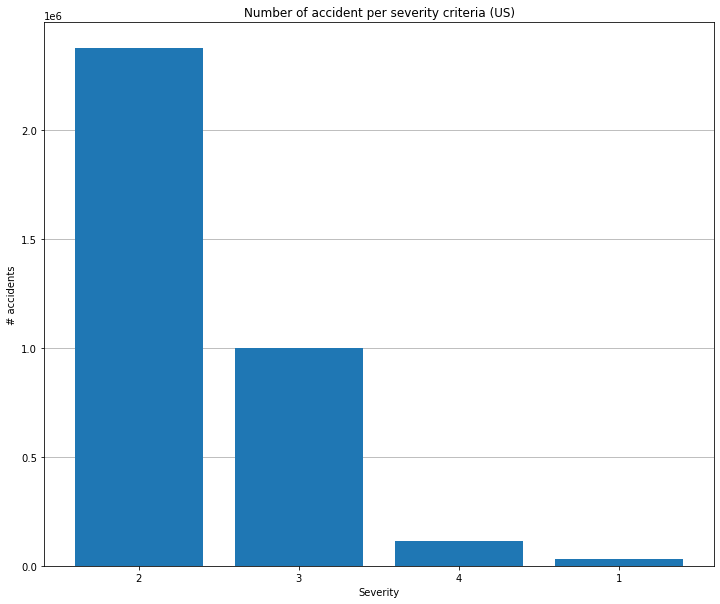

In [16]:
X=us_accidents_per_sev_count.index
Y=us_accidents_per_sev_count.values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Severity') 
plt.ylabel('# accidents') 
plt.title('Number of accident per severity criteria (US)') 

plt.savefig('figures/BAR_CHART_acc_number_per_severity.png')
plt.show()


We can observ that we have a lot of moderatly severe accident (severity=2), then Highly severe accident (severity=3).
We have few accidents recorded with a severity value of 4 (very high severity) or 1 (low severity).
I we are interest of the proportion overview, we can use a pie chart.

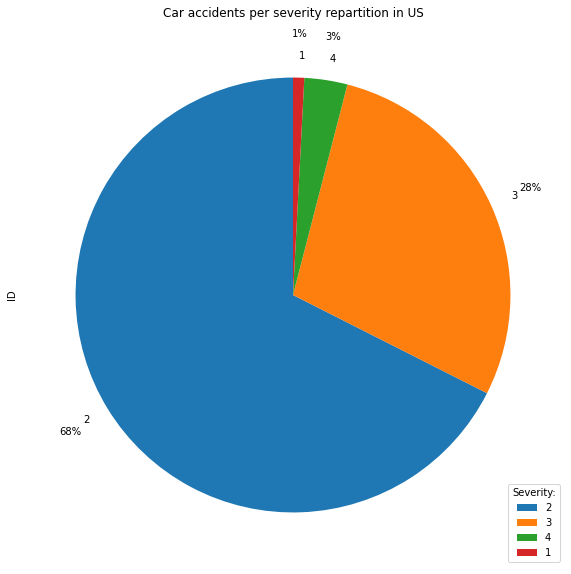

In [17]:
# plot as a simple pie chart
plot = us_accidents_per_sev_count.plot.pie(
    #legend=True, 
    figsize=(10, 10),
    startangle=90,
    #labels=['','','',''],
    autopct='%1.0f%%',
    pctdistance=1.2, 
    #labeldistance=0.5
)

plt.legend(title = "Severity:")
plt.title('Car accidents per severity repartition in US')
plt.savefig('figures/PIE_CHART_acc_number_per_severity_US.png')
plt.show()

### <span style="color:orange">III.2. Weather conditions evaluation (global dataset)</span>
Let's have a look at the ```Weather_Condition``` column. 
It should be a kind of synthesis of other weather related column containing quantitativ variables (Humidity, Pressure, Visilility, Wind speed, etc.).


In [18]:
# Get weather conditions
weather_conditions=us_accidents['Weather_Condition'].unique()

# check the values available per year in the dataset
us_accidents_per_wc_count = us_accidents.groupby(['Weather_Condition'])['ID'].count().sort_values(ascending=False)
print('Shape of the dataset: '+ str(us_accidents_per_wc_count.shape))

Shape of the dataset: (127,)


If we simply list which kind of conditions we have:

In [19]:
weather_conditions

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

We can observ that some  weather conditions in the list are combining different values, like ```Thunder and Hail / Windy```.

If we now plot the main weather conditions (by fixing a minimum number of occurence), we have:

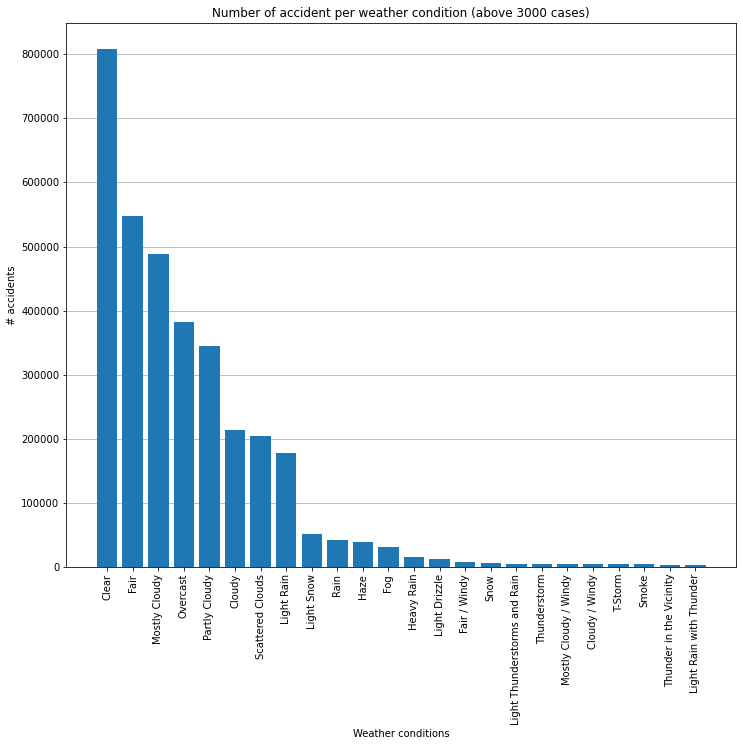

In [20]:
# limit the number of counted record for display purpose
limit = 3000

X=us_accidents_per_wc_count[us_accidents_per_wc_count.values > limit].index
Y=us_accidents_per_wc_count[us_accidents_per_wc_count.values > limit].values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Weather conditions') 
plt.xticks(rotation=90)
plt.ylabel('# accidents') 
plt.title('Number of accident per weather condition (above ' +str(limit)+' cases)') 

plt.savefig('figures/BAR_CHART_acc_number_per_weather_cond.png')
plt.show()


We can see that the most important weather conditions (above 100000 cases) are not 'extreme' but rather 'common'.

### <span style="color:orange">III.3. Weather conditions per severity evaluation (global dataset)</span>
If we consider weather conditions in the 4 different severity values separatly (for a minimum number of occurence), we have:


Severity 1
Shape of the dataset: (52,)


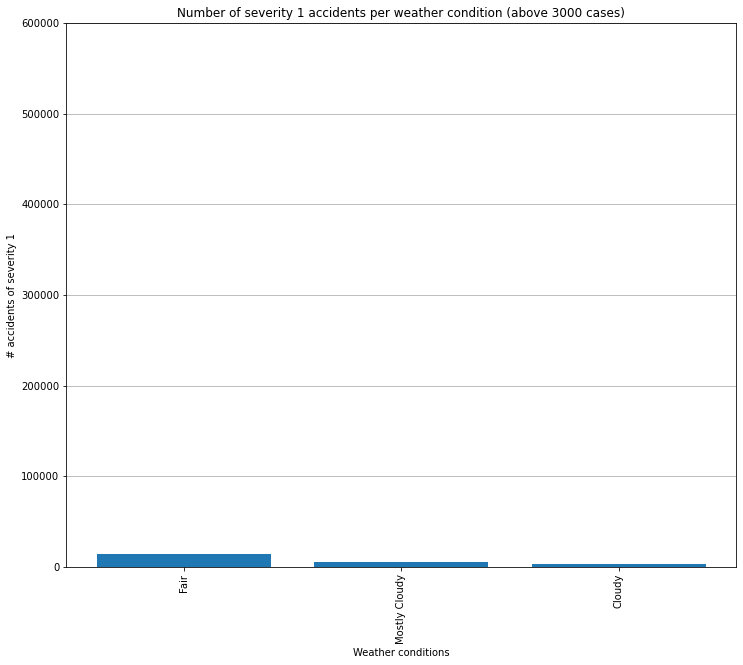

Severity 2
Shape of the dataset: (116,)


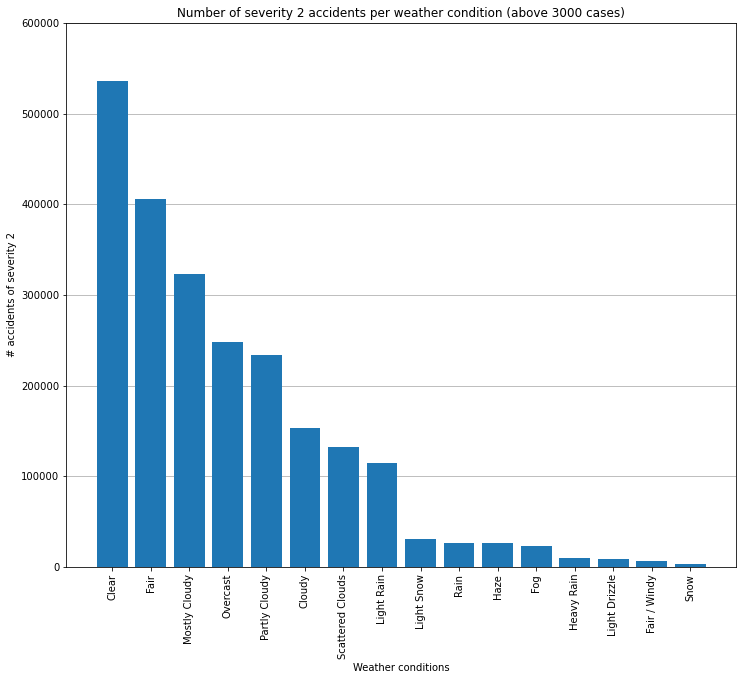

Severity 3
Shape of the dataset: (116,)


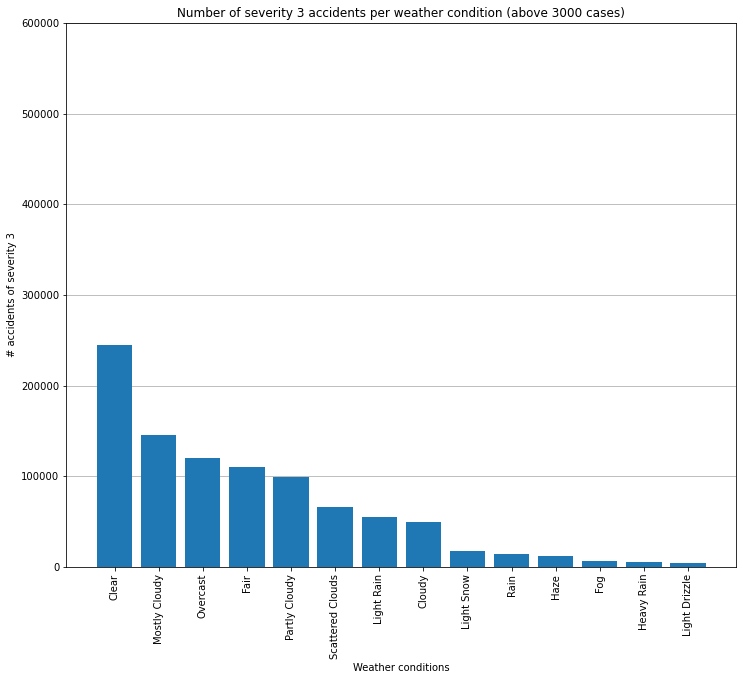

Severity 4
Shape of the dataset: (79,)


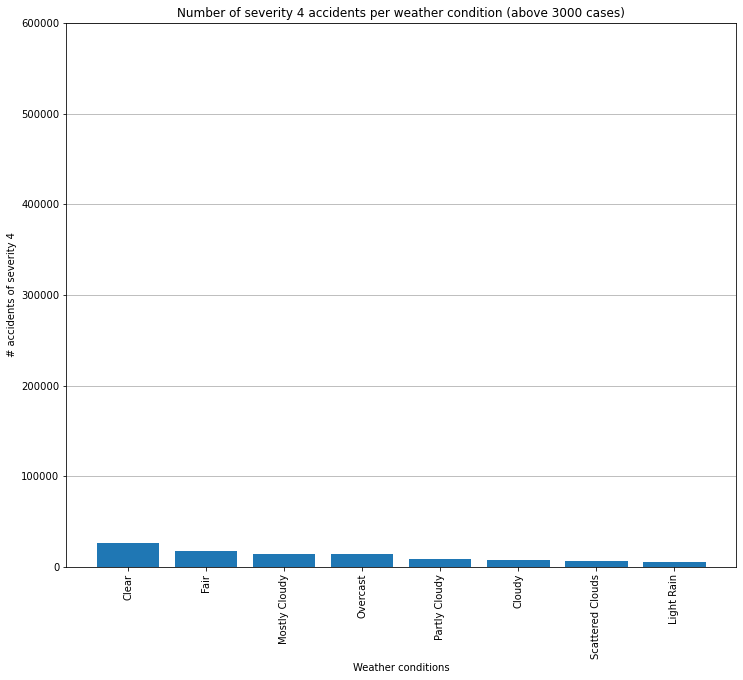

In [21]:
# Get weather conditions
weather_conditions=us_accidents['Weather_Condition'].unique()

# limit the number of counted record for display purpose
limit = 3000

# Create severity ordered list as an np array to loop on it
# severity= np.array([1, 2, 3, 4])
severity= ['1', '2', '3', '4']

# check the values available per year in the dataset
for i in severity:
    print('Severity '+str(i))
    us_accidents_per_wc_count_group = us_accidents[us_accidents['Severity']==i].groupby(['Weather_Condition'])['ID'].count().sort_values(ascending=False)
    print('Shape of the dataset: '+ str(us_accidents_per_wc_count_group.shape))
    
    X=us_accidents_per_wc_count_group[us_accidents_per_wc_count_group.values > limit].index
    Y=us_accidents_per_wc_count_group[us_accidents_per_wc_count_group.values > limit].values

    # set fig size
    fig, ax = plt.subplots(figsize=(12,10))

    # add horizontal lines
    plt.grid(b=True, axis='y',zorder=1)

    # plot it in a bar chart
    plt.bar(X, Y,zorder=2)

    # set axes label and title
    plt.xlabel('Weather conditions') 
    plt.xticks(rotation=90)
    plt.ylabel('# accidents of severity '+str(i)) 
    plt.title('Number of severity '+str(i)+' accidents per weather condition (above ' +str(limit)+' cases)') 
    ax.set_ylim(0,600000)
    plt.savefig('figures/BAR_CHART_acc_number_per_weather_cond_severity'+str(i)+'.png')
    plt.show()


The obtained results show:

- __Severity 1__: The fair condition is the most important, then come the cloudy conditions and finally the light rain.
- __Severity 2__: it is the category with the most of occurence. We can observ that fair and clear conditions are the most important. Cloudy conditions come after and then the rainy conditions. Snow and more "extreme" weather conditions come after.
- __Severity 3__: The fair condition is less important than for severity 1 and 2. This time the Clear weather condition is the most important. The Mostly cloudy, overcast and other "cloudy" conditions are following. After the snowy and rainy conditions are following.
- __Severity 4__: we have almost the same order than the severity 2 case.
    



<span style="color:red">__After this overview it is difficult to identify any clear trend between ```severity``` and the textual ```weather condition``` description.
Also, at this stage we have no idea what kind of weather or climat is common in the areas affected by the accidents.__</span>



### <span style="color:orange">III.4. Spatial distribution of the accidents (global dataset)</span>


If we naively group accident by state and plot it on an informativ map:

In [22]:
us_accidents_per_state = us_accidents.groupby(['State'])['ID'].count().sort_values(ascending=False)
print('Shape of the dataset: '+ str(us_accidents_per_state.shape))

Shape of the dataset: (49,)


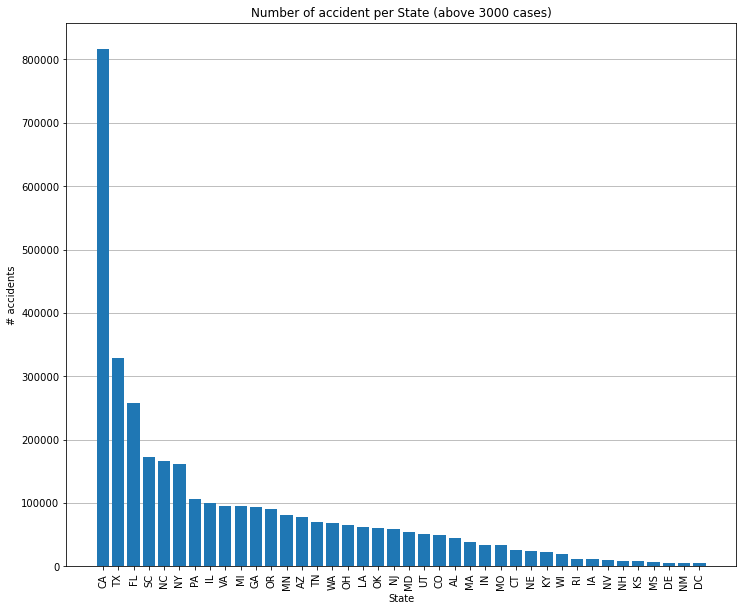

In [23]:
# limit the number of counted record for display purpose
limit = 3000

X=us_accidents_per_state[us_accidents_per_state.values > limit].index
Y=us_accidents_per_state[us_accidents_per_state.values > limit].values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('State') 
plt.xticks(rotation=90)
plt.ylabel('# accidents') 
plt.title('Number of accident per State (above ' +str(limit)+' cases)') 

plt.savefig('figures/BAR_CHART_acc_number_per_state.png')
plt.show()




<span style="color:red">We can observ that reported accidents are not spatially homogeneously distributed across US territory.
If we plot it __naively__ (no specific thematic mapping), we obtain:</span>


In [24]:
# join geographical state geometries and number of accident per state
gdf_us_accidents_per_state = gdf_us_states_albers.merge(
    us_accidents_per_state,
    right_index=True,
    left_on='STUSPS',
    how='left'
)
gdf_us_accidents_per_state.rename(columns = {'ID':'Accident_number'}, inplace = True) 

print('Dimensions of the dataset: ' )
gdf_us_accidents_per_state.shape



Dimensions of the dataset: 


(56, 16)

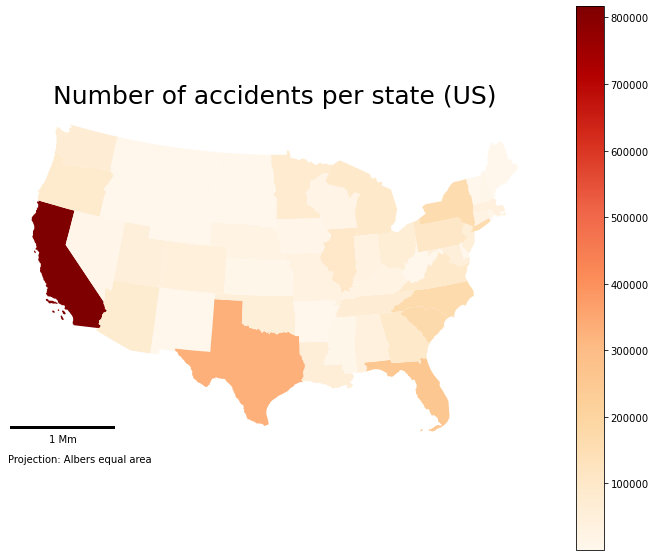

In [25]:
fig, ax = plt.subplots(figsize=(12,10))

ax.axis('off')

# scheme option can be set to any scheme provided by mapclassify 
# (e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’
gdf_us_accidents_per_state.plot(
    column='Accident_number',
    cmap='OrRd',
    scheme=None,
    ax=ax, 
    legend=True
)

ax.set_title('Number of accidents per state (US)', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.text(0.27, -0.05, 'Projection: Albers equal area',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)

scalebar = ScaleBar(dx=1,units='m',dimension='si-length',location='lower left')

plt.gca().add_artist(scalebar)

We can observ that some states are missing (Alaska, Hawaï,...) and that California is the "hot spot" of this dataset.

Probably due to the source of data location.

Here is the list of US states without car accident in our dataset:

In [26]:
no_acc_states = gdf_us_accidents_per_state[gdf_us_accidents_per_state['Accident_number'].isna()].NAME.values

print('List of the states without recorded accident data: ')
for s in no_acc_states:
    print('- ' + str(s))

List of the states without recorded accident data: 
- Hawaii
- United States Virgin Islands
- Commonwealth of the Northern Mariana Islands
- Guam
- Alaska
- American Samoa
- Puerto Rico


<span style="color:red">__As the weather conditions are variable and very different across the United States, we will focus on the ```California``` to have the most data with similar location conditions (type of climat, way of conduct, ...) in a second approach. These data will be more similar in terms of behaviors and potential cause-consequence relationships.__</span>

### <span style="color:orange">III.5. Severity criteria evaluation (California)</span>

In [27]:
# filter dataset on California state
ca_accidents=us_accidents[us_accidents['State']=='CA']
print('Shape of the dataset: '+ str(ca_accidents.shape))

Shape of the dataset: (816826, 49)


If we focus on the number of accidents per severity category:

In [28]:
# group accidents by severity
ca_accidents_per_sev_count = ca_accidents.groupby(['Severity'])['ID'].count().sort_values(ascending=False)
print('Shape of the dataset: '+ str(ca_accidents_per_sev_count.shape))

Shape of the dataset: (4,)


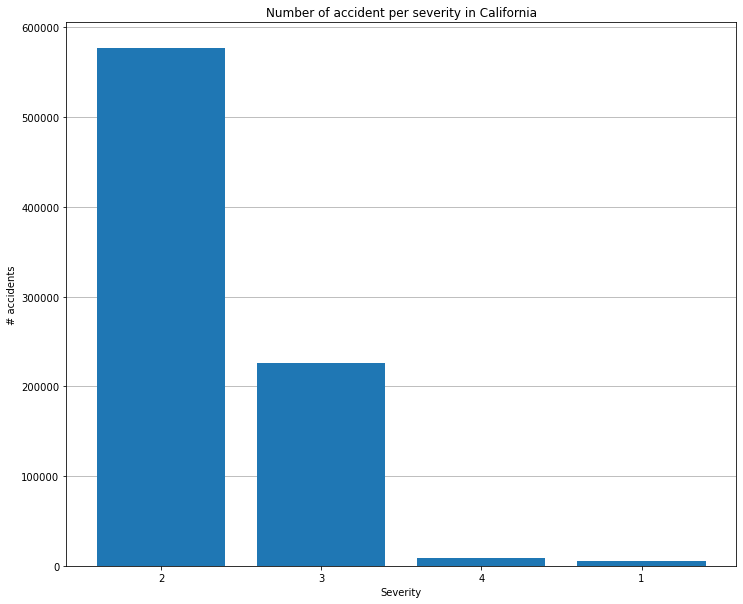

In [29]:
X=ca_accidents_per_sev_count.index
Y=ca_accidents_per_sev_count.values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Severity') 
plt.ylabel('# accidents') 
plt.title('Number of accident per severity in California') 

plt.savefig('figures/BAR_CHART_acc_number_per_severity_CA.png')
plt.show()


We can observe that we have the same behavior than globally in the full dataset with proportionally less ```severity 4``` accidents:

In [30]:
# plot as a simple pie chart
plot = ca_accidents_per_sev_count.plot.pie(
    legend=True, 
    figsize=(10, 10),
    startangle=90,
    autopct='%1.0f%%',
    pctdistance=1.2, 
    #labeldistance=0.5
)
plt.legend(title = "Severity:")
plt.title('Car accidents per severity repartition in California')
plt.savefig('figures/PIE_CHART_acc_number_per_severity_CA.png')
plt.show()

### <span style="color:orange">III.6. Weather conditions evaluation (California)</span>

Like previously, if we consider the ```Weather_Condition``` column for ```California``` as a kind of synthesis of other weather related column containing quantitativ variables (Humidity, Pressure, Visilility, Wind speed, etc.).


In [31]:
# Get weather conditions
weather_conditions_ca=ca_accidents['Weather_Condition'].unique()

# check the values available per year in the dataset
ca_accidents_per_wc_count = ca_accidents.groupby(['Weather_Condition'])['ID'].count().sort_values(ascending=False)
print('Shape of the dataset: '+ str(ca_accidents_per_wc_count.shape))

Shape of the dataset: (72,)


We have less weather conditions encoded for California:

In [32]:
print('- Weather condition for full dataset: '+ str(us_accidents_per_wc_count.shape[0]))
print('- Weather condition for california: '+ str(ca_accidents_per_wc_count.shape[0]))
print('- Difference: '+ str(us_accidents_per_wc_count.shape[0] - ca_accidents_per_wc_count.shape[0]))

- Weather condition for full dataset: 127
- Weather condition for california: 72
- Difference: 55


The list of the different weather conditions used for the californian subset is:

In [33]:
weather_conditions_ca

array(['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast',
       'Scattered Clouds', 'Light Rain', nan, 'Mist', 'Smoke', 'Fog',
       'Patches of Fog', 'Rain', 'Light Drizzle', 'Heavy Rain',
       'Shallow Fog', 'Light Snow', 'Snow', 'Light Freezing Fog',
       'Light Haze', 'Light Thunderstorms and Rain', 'Light Rain Showers',
       'Thunderstorms and Rain', 'Fair', 'Cloudy', 'Volcanic Ash',
       'Blowing Sand', 'Drizzle', 'Blowing Dust / Windy',
       'Widespread Dust', 'Fair / Windy', 'Rain Showers',
       'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail',
       'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Rain / Windy', 'Heavy Rain / Windy', 'Light Freezing Rain',
       'Squalls', 'Cloudy / Windy', 'Blowing Dust', 'Haze / Windy',
       'Heavy T-Storm', 'Heavy Snow', 'Light Rain Shower / Windy',
       'Fog / W

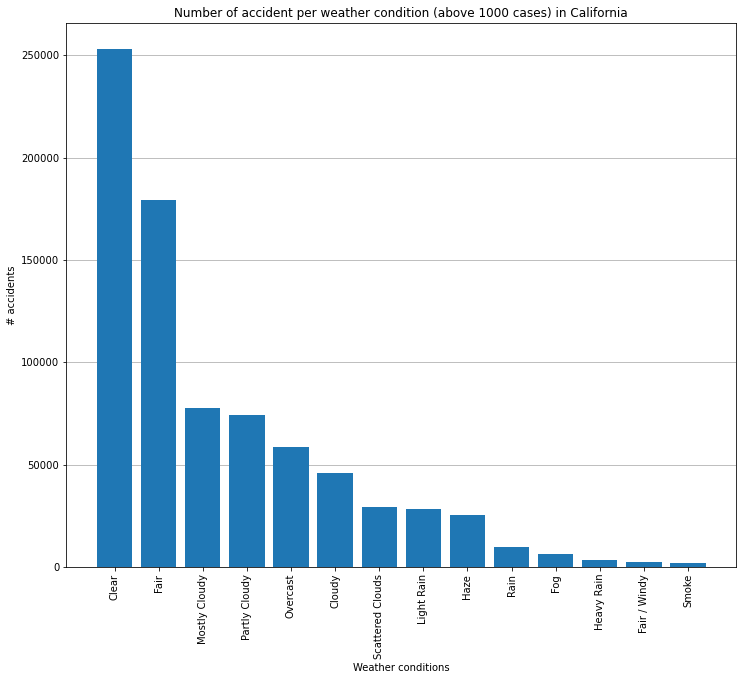

In [34]:
# limit the number of counted record for display purpose
limit = 1000

X=ca_accidents_per_wc_count[ca_accidents_per_wc_count.values > limit].index
Y=ca_accidents_per_wc_count[ca_accidents_per_wc_count.values > limit].values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Weather conditions') 
plt.xticks(rotation=90)
plt.ylabel('# accidents') 
plt.title('Number of accident per weather condition (above ' +str(limit)+' cases) in California') 

plt.savefig('figures/BAR_CHART_acc_number_per_weather_cond_CA.png')
plt.show()


Clear and Fair weather conditions are the top 2 conditions. Then come several 'Cloudy' conditions. At the end we find rainy and fog conditions.

### <span style="color:orange">III.7. Weather conditions per severity evaluation (California)</span>

Severity 1
Shape of the dataset: (23,)


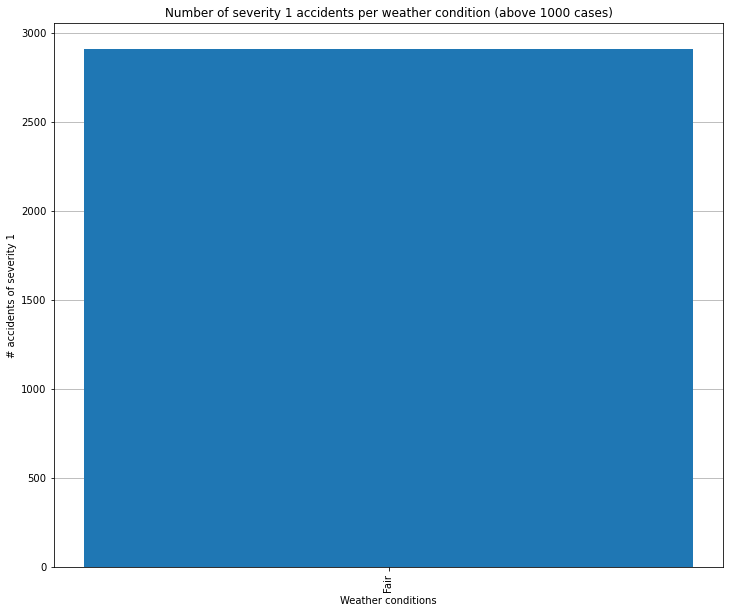

Severity 2
Shape of the dataset: (69,)


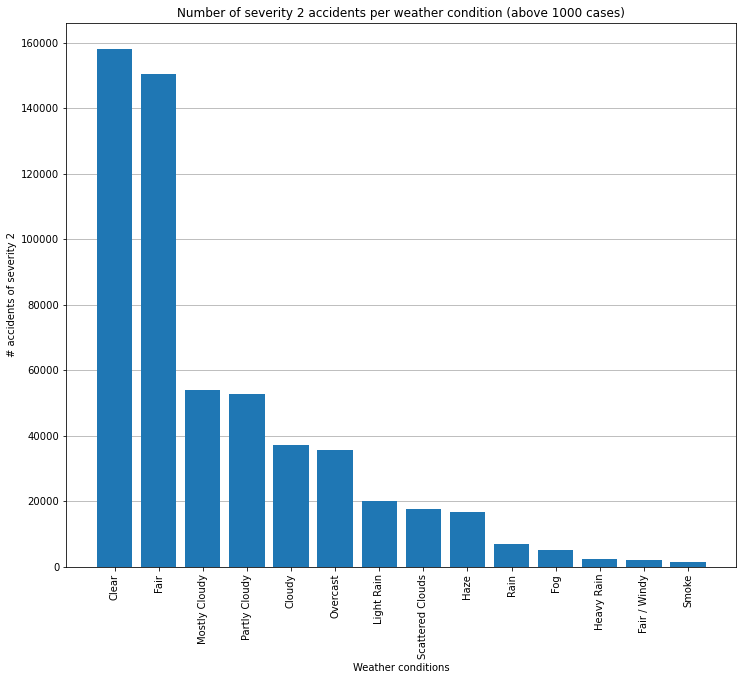

Severity 3
Shape of the dataset: (56,)


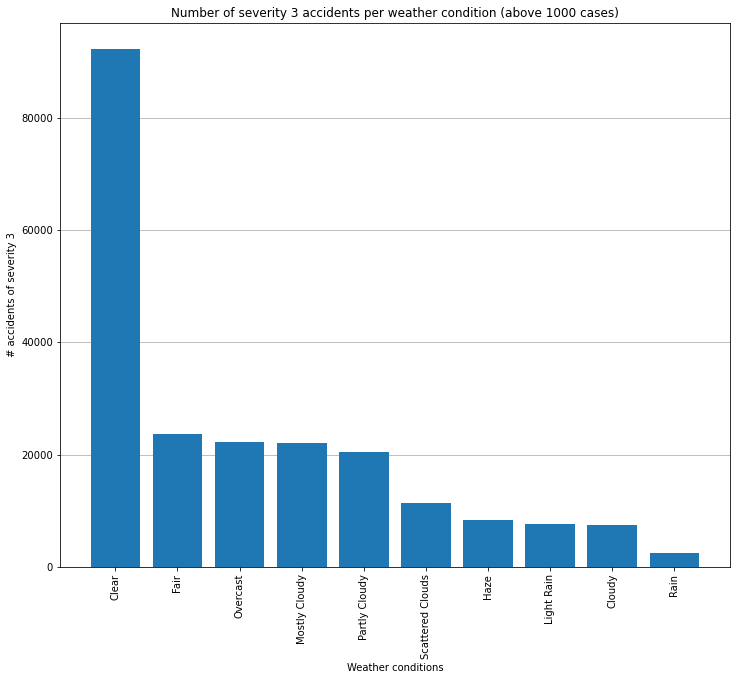

Severity 4
Shape of the dataset: (36,)


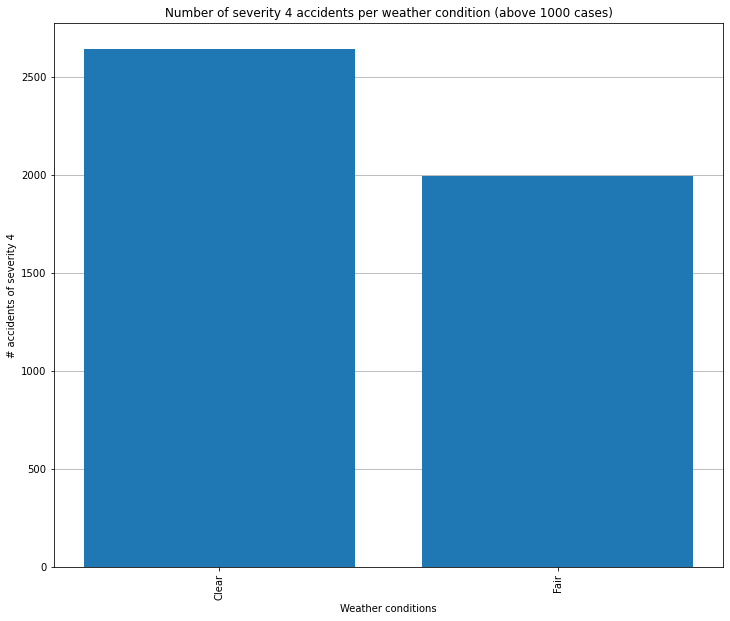

In [35]:
# Get weather conditions
weather_conditions_ca=ca_accidents['Weather_Condition'].unique()

# limit the number of counted record for display purpose
limit = 1000

# Create severity ordered list as an np array to loop on it
# severity= np.array([1, 2, 3, 4])
severity= ['1', '2', '3', '4']

# check the values available per year in the dataset
for i in severity:
    print('Severity '+str(i))
    ca_accidents_per_wc_count_group = ca_accidents[ca_accidents['Severity']==i].groupby(['Weather_Condition'])['ID'].count().sort_values(ascending=False)
    print('Shape of the dataset: '+ str(ca_accidents_per_wc_count_group.shape))
    
    X=ca_accidents_per_wc_count_group[ca_accidents_per_wc_count_group.values > limit].index
    Y=ca_accidents_per_wc_count_group[ca_accidents_per_wc_count_group.values > limit].values

    # set fig size
    fig, ax = plt.subplots(figsize=(12,10))

    # add horizontal lines
    plt.grid(b=True, axis='y',zorder=1)

    # plot it in a bar chart
    plt.bar(X, Y,zorder=2)

    # set axes label and title
    plt.xlabel('Weather conditions') 
    plt.xticks(rotation=90)
    plt.ylabel('# accidents of severity '+str(i)) 
    plt.title('Number of severity '+str(i)+' accidents per weather condition (above ' +str(limit)+' cases)') 

    plt.savefig('figures/BAR_CHART_acc_number_per_weather_cond_severity_CA'+str(i)+'.png')
    plt.show()


The minority severty criteria have limited number of weather conditions. We will see if these conditions can help to predict the severity in the next steps.

### <span style="color:orange">III.8. Spatial distribution of the accidents (California)</span>

In [36]:
gdf_ca_accidents = gpd.GeoDataFrame(
    ca_accidents, 
    geometry=gpd.points_from_xy(ca_accidents['Start_Lng'], ca_accidents['Start_Lat'])
)
# init a lat-lon coordinate system (EPSG 4326)
gdf_ca_accidents.set_crs(epsg=4326, inplace=True)

# Get a copy of accident dataset (california) in albers coordinate system
gdf_ca_accidents_albers = gdf_ca_accidents.copy()
gdf_ca_accidents_albers = gdf_ca_accidents.to_crs("ESRI:102003")

To plot main californian cities on the map, we extract them using a (geo)spatial query of ```clip```.

This clip is applying a "point in polygon" algorithm and we keep the cities (=points) contained in the california shape (=polygon)


In [37]:
# Get california shape in lat-lon coordinate system (EPSG 4326)
gdf_california_4326 = gdf_us_states[gdf_us_states['STUSPS'] == 'CA'].to_crs("EPSG:4326")

# apply a clip using point in polygon algorithm
gdf_ca_cities = gpd.clip(
    gdf_world_cities, 
    gdf_california_4326)

print('Shape of the dataset: '+ str(gdf_ca_cities.shape))

Shape of the dataset: (2, 120)


In [38]:
# reproject cities of california
gdf_ca_cities_albers = gdf_ca_cities.copy()
gdf_ca_cities_albers = gdf_ca_cities.to_crs("ESRI:102003")

We will use a ```Kernel Density Estimator``` to plot a californian car accident __Heat Map__.

According to wikipedia ( https://en.wikipedia.org/wiki/Kernel_density_estimation ), KDE is defined as:
> _In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample._

In this geographical use case, we consider a circular neighborhood around each sample point (considering a given radius) and then applies a math function that goes 
- from 1 at the location of the point 
- to 0 at the neighborhood boundary. 

Then, we generate a resulting image combining all the sample point neighborhood.
Density value for each cell is calculated by adding the values of all the kernel surfaces where they overlay the cell center.


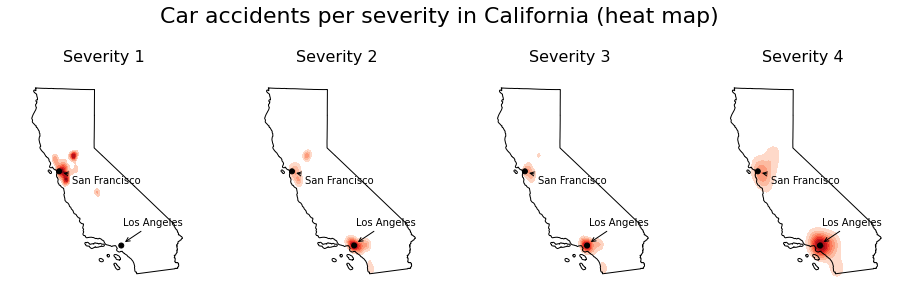

In [39]:
# Create a projection for california
proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)

# 2 by 2 square configuration
#fig = plt.figure(figsize=(15,12))
#ax1 = plt.subplot(221, projection=proj)
#ax2 = plt.subplot(222, projection=proj)
#ax3 = plt.subplot(223, projection=proj)
#ax4 = plt.subplot(224, projection=proj)

# 4 in line configuration
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(141, projection=proj)
ax2 = plt.subplot(142, projection=proj)
ax3 = plt.subplot(143, projection=proj)
ax4 = plt.subplot(144, projection=proj)

# Set title
plt.suptitle('Car accidents per severity in California (heat map)', fontsize=22)

##############
# Severity 1 #
##############

ax1.set_title("Severity 1",fontsize=16)
gplt.pointplot(
    gdf_ca_cities, 
    projection=proj,
    #s=2, 
    color='black', 
    ax=ax1,
    zorder=3
)
gplt.kdeplot(
    gdf_ca_accidents[gdf_ca_accidents['Severity'] == '1'],
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    #clip=gdf_us_states.geometry,
    ax=ax1,
    zorder=1
)
gplt.polyplot(
    gdf_us_states[gdf_us_states['STUSPS'] == 'CA'], 
    zorder=2,
    projection=proj,
    ax=ax1
)
ax1.annotate(
    "Los Angeles",
    xy=(125000,-350000),
    xycoords='data',
    xytext=(125000,-250000),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)
ax1.annotate(
    "San Francisco",
    xy=(-240000,65000),
    xycoords='data',
    xytext=(-175000,0),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)



##############
# Severity 2 #
##############

ax2.set_title("Severity 2",fontsize=16)
gplt.pointplot(
    gdf_ca_cities, 
    projection=proj,
    #s=2, 
    color='black', 
    ax=ax2,
    zorder=3
)
gplt.kdeplot(
    gdf_ca_accidents[gdf_ca_accidents['Severity'] == '2'],
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    #clip=gdf_us_states.geometry,
    ax=ax2,
    zorder=1
)
gplt.polyplot(
    gdf_us_states[gdf_us_states['STUSPS'] == 'CA'], 
    zorder=2,
    projection=proj,
    ax=ax2
)
ax2.annotate(
    "Los Angeles",
    xy=(125000,-350000),
    xycoords='data',
    xytext=(125000,-250000),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)
ax2.annotate(
    "San Francisco",
    xy=(-240000,65000),
    xycoords='data',
    xytext=(-175000,0),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)

##############
# Severity 3 #
##############

ax3.set_title("Severity 3",fontsize=16)
gplt.pointplot(
    gdf_ca_cities, 
    projection=proj,
    #s=2, 
    color='black', 
    ax=ax3,
    zorder=3
)
gplt.kdeplot(
    gdf_ca_accidents[gdf_ca_accidents['Severity'] == '3'],
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    #clip=gdf_us_states.geometry,
    ax=ax3,
    zorder=1
)
gplt.polyplot(
    gdf_us_states[gdf_us_states['STUSPS'] == 'CA'], 
    zorder=2,
    projection=proj,
    ax=ax3
)
ax3.annotate(
    "Los Angeles",
    xy=(125000,-350000),
    xycoords='data',
    xytext=(125000,-250000),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)
ax3.annotate(
    "San Francisco",
    xy=(-240000,65000),
    xycoords='data',
    xytext=(-175000,0),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)

##############
# Severity 4 #
##############

ax4.set_title("Severity 4",fontsize=16)
gplt.pointplot(
    gdf_ca_cities, 
    projection=proj,
    #s=2, 
    color='black', 
    ax=ax4,
    zorder=3
)
gplt.kdeplot(
    gdf_ca_accidents[gdf_ca_accidents['Severity'] == '4'],
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    #clip=gdf_us_states.geometry,
    ax=ax4,
    zorder=1
)
gplt.polyplot(
    gdf_us_states[gdf_us_states['STUSPS'] == 'CA'], 
    zorder=2,
    projection=proj,
    ax=ax4
)
ax4.annotate(
    "Los Angeles",
    xy=(125000,-350000),
    xycoords='data',
    xytext=(125000,-250000),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)
ax4.annotate(
    "San Francisco",
    xy=(-240000,65000),
    xycoords='data',
    xytext=(-175000,0),
    textcoords='data',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3"),
)

plt.savefig('figures/Heat_map_acc_CA.png')
plt.show()

Firstly, we can observ that car accidents are mainly around two main cities of California: __San Francisco__ and __Los Angeles__.

Then, we can add some observations:
- Less severe accidents (severity=1) are mainly registered near San Francisco
- Middle severity accident (severity=2 and severity=3) are mainly around Los Angeles
- Very high severity accident (severity=4) are more present near Los Angeles

However, we must be careful about the conclusions drawn because:
- field measurement methods may be different or data may come from different sources
- more densely populated places will inevitably generate more accidents

---------------------------
## <span style="color:red">__IV. Data preparation__</span>
---------------------------

### <span style="color:orange">IV.1. Weather conditions formatting</span>
#### __Features definition:__

Based on the column definitions provided at the beginning, we identify manually the weather relevant columns in a list:

In [40]:
weather_features=[
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    #'Wind_Direction',
    'Wind_Speed(mph)',
    'Precipitation(in)']

#### __Full dataset formatting:__

Then we clean the data which doesn't contain any value for these selected cols:

In [41]:
# drop NaN value considering weather_features
us_accidents_weather = us_accidents.dropna(subset=weather_features)

before=us_accidents.shape
after=us_accidents_weather.shape

print('Shape of the dataset before cleaning: '+ str(before[0]))
print('Shape of the dataset after cleaning: '+ str(after[0]))

difference= before[0]-after[0]
ratio= after[0]/before[0]
print('Removed rows: '+ str(difference) + ' (-'+ str(100-round(ratio*100,2))+'%)')

Shape of the dataset before cleaning: 3513740
Shape of the dataset after cleaning: 1282049
Removed rows: 2231691 (-63.51%)


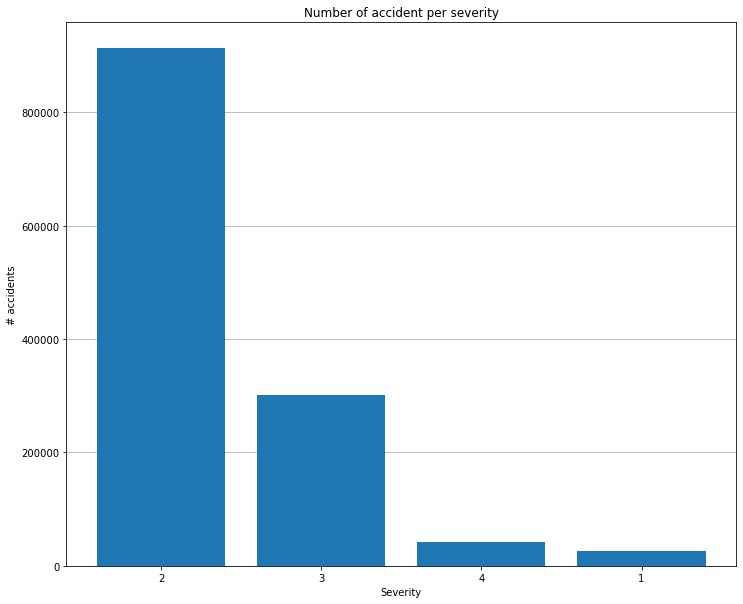

In [42]:
# limit the number of counted record for display purpose
us_accidents_per_sev_count = us_accidents_weather.groupby(['Severity'])['ID'].count().sort_values(ascending=False)

X=us_accidents_per_sev_count.index
Y=us_accidents_per_sev_count.values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Severity') 
plt.ylabel('# accidents') 
plt.title('Number of accident per severity') 

plt.savefig('figures/BAR_CHART_acc_number_per_severity.png')
plt.show()


#### __Californian data formatting:__

In [43]:
# drop NaN value considering weather_features
ca_accidents_weather = ca_accidents.dropna(subset=weather_features)

before=ca_accidents.shape
after=ca_accidents_weather.shape

print('Shape of the dataset before cleaning: '+ str(before[0]))
print('Shape of the dataset after cleaning: '+ str(after[0]))

difference= before[0]-after[0]
ratio= after[0]/before[0]
print('Removed rows: '+ str(difference) + ' (-'+ str(100-round(ratio*100,2))+'%)')

Shape of the dataset before cleaning: 816826
Shape of the dataset after cleaning: 296739
Removed rows: 520087 (-63.67%)


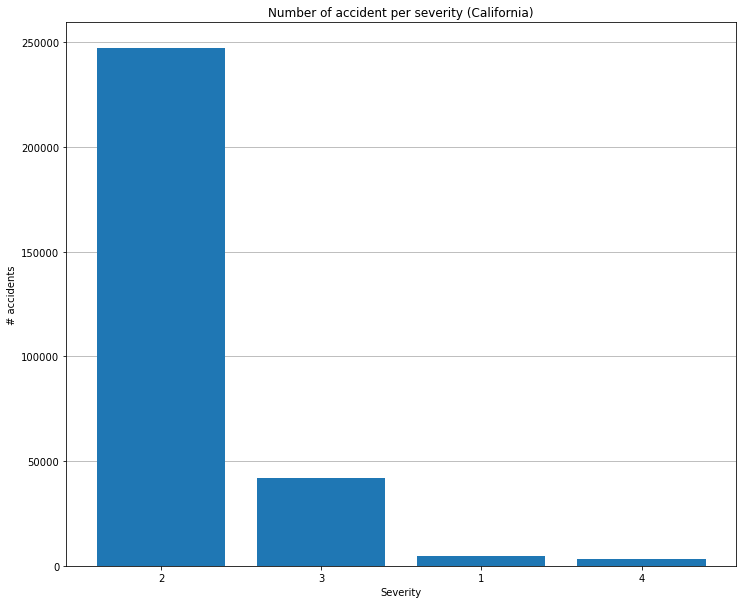

In [44]:
# limit the number of counted record for display purpose
ca_accidents_per_sev_count = ca_accidents_weather.groupby(['Severity'])['ID'].count().sort_values(ascending=False)

X=ca_accidents_per_sev_count.index
Y=ca_accidents_per_sev_count.values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Severity') 
plt.ylabel('# accidents') 
plt.title('Number of accident per severity (California)') 

plt.savefig('figures/BAR_CHART_acc_number_per_severity_CA.png')
plt.show()


### <span style="color:orange">IV.2. Weather and POI formatting</span>
#### __Features definition:__

In [45]:
weather_and_poi_features=[
    'Temperature(F)',
     #'Wind_Chill(F)',
    'Humidity(%)',
    #'Pressure(in)',
    'Visibility(mi)',
    #'Wind_Direction',
    'Wind_Speed(mph)',
    'Precipitation(in)',
    'Amenity',
    'Bump',
    'Crossing',
    #'Give_Way',
    'Junction',
    #'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    #'Traffic_Signal',
    #'Turning_Loop',
    #'Sunrise_Sunset'
]

#### __Full dataset formatting:__

In [46]:
# drop NaN value considering weather_features
us_accidents_weather_and_poi = us_accidents.dropna(subset=weather_and_poi_features)

before=us_accidents.shape
after=us_accidents_weather_and_poi.shape

print('Shape of the dataset before cleaning: '+ str(before[0]))
print('Shape of the dataset after cleaning: '+ str(after[0]))

difference= before[0]-after[0]
ratio= after[0]/before[0]
print('Removed rows: '+ str(difference) + ' (-'+ str(100-round(ratio*100,2))+'%)')

Shape of the dataset before cleaning: 3513740
Shape of the dataset after cleaning: 1436594
Removed rows: 2077146 (-59.11%)


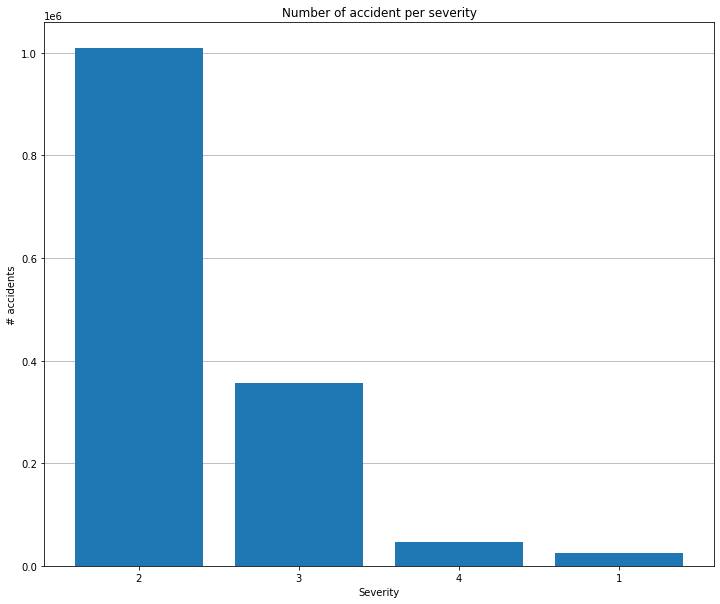

In [47]:
# limit the number of counted record for display purpose
us_accidents_per_sev_count = us_accidents_weather_and_poi.groupby(['Severity'])['ID'].count().sort_values(ascending=False)

X=us_accidents_per_sev_count.index
Y=us_accidents_per_sev_count.values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Severity') 
plt.ylabel('# accidents') 
plt.title('Number of accident per severity') 

plt.savefig('figures/BAR_CHART_acc_number_per_severity_weather_and_poi.png')
plt.show()


#### __Californian data formatting:__

In [48]:
# drop NaN value considering weather_features
ca_accidents_weather_and_poi = ca_accidents.dropna(subset=weather_and_poi_features)

before=ca_accidents.shape
after=ca_accidents_weather_and_poi.shape

print('Shape of the dataset before cleaning: '+ str(before[0]))
print('Shape of the dataset after cleaning: '+ str(after[0]))

difference= before[0]-after[0]
ratio= after[0]/before[0]
print('Removed rows: '+ str(difference) + ' (-'+ str(100-round(ratio*100,2))+'%)')

Shape of the dataset before cleaning: 816826
Shape of the dataset after cleaning: 320375
Removed rows: 496451 (-60.78%)


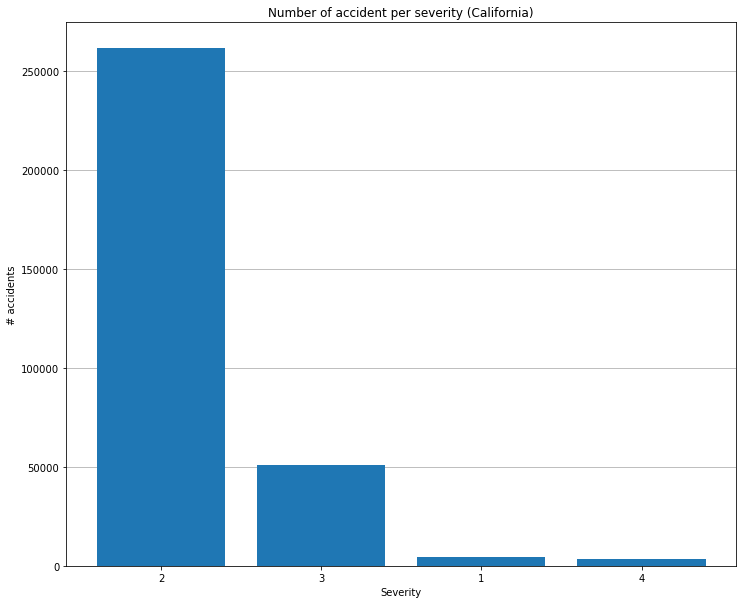

In [49]:
# limit the number of counted record for display purpose
ca_accidents_per_sev_count = ca_accidents_weather_and_poi.groupby(['Severity'])['ID'].count().sort_values(ascending=False)

X=ca_accidents_per_sev_count.index
Y=ca_accidents_per_sev_count.values

# set fig size
fig, ax = plt.subplots(figsize=(12,10))

# add horizontal lines
plt.grid(b=True, axis='y',zorder=1)

# plot it in a bar chart
plt.bar(X, Y,zorder=2)

# set axes label and title
plt.xlabel('Severity') 
plt.ylabel('# accidents') 
plt.title('Number of accident per severity (California)') 

plt.savefig('figures/BAR_CHART_acc_number_per_severity_weather_and_poi_CA.png')
plt.show()


---------------------------
## <span style="color:red">__V. Decision tree classification__</span>
---------------------------

In this last step, we try to predict the severity of car accidents considering some features determining the context. These features are selected in the weather measures and the road development proximity.

Given that we already know the categories we want to predict (= severity criteria from 1 to 4), we are in a ```Supervised approach```. The targeted value of prediction is a category considering quantitative input data, we are then in a ```classification``` problem. 
As a first approach of the question, the chosen algorithm here is the ```decision tree```, studied in the machine learning introduction course.

### <span style="color:orange">V.1. Predictions based on weather conditions (full dataset)</span>
#### __Data subdivision in tests and training:__

Now we can organize data into formatted subsets for the ML training:
- target results
- data source
- split in training (67%) and test (33%) subsets

In [50]:
# Store target results in Y
Y=us_accidents_weather[['Severity']].copy()

# Store data source in X
X=us_accidents_weather[weather_features].copy()

# Split in training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

#### __Model training:__


We will fit a ```decision tree``` classifier:

In [51]:
severity_classifier=DecisionTreeClassifier(
    max_leaf_nodes=50, 
    random_state=0)
severity_classifier.fit(X_train, Y_train)

# Get severity values
severity_list= list(map(str,us_accidents['Severity'].unique().tolist()))

# Visualize Tree
dotfile = open("model/dtree_us_weather_features.dot", 'w')
tree.export_graphviz(
    severity_classifier, 
    out_file = dotfile, 
    feature_names=weather_features, 
    #filled=True, 
    filled=False, 
    rounded=True, 
    impurity=False, 
    #label='all',
    class_names=severity_list)
dotfile.close()

#### __Predicted rows overview:__


In [52]:
predictions = severity_classifier.predict(X_test)
predictions[:10]

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2'], dtype=object)

In [53]:
Y_test['Severity'][:10].values

array(['2', '2', '2', '3', '2', '3', '3', '3', '2', '2'], dtype=object)

#### __Model accuracy:__


In [54]:
acc_score = accuracy_score(y_true = Y_test, y_pred = predictions)
print('Accuracy score of the predictions is: ' + str(round(acc_score,4)*100) +' %')

Accuracy score of the predictions is: 71.33 %


In [55]:
# count per severity in the predicted set
predict_counts = np.unique(predictions, return_counts=True) 

# count per severity in the test set
valid_counts = np.unique(Y_test, return_counts=True) 


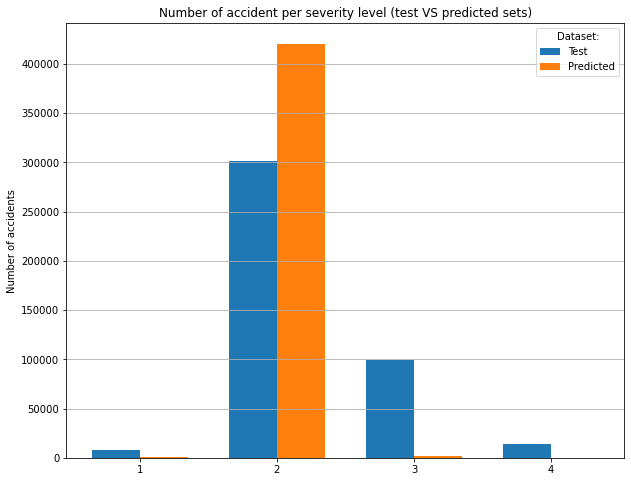

In [56]:
labels=['1', '2', '3', '4']

# need to append a 0 to the missing value, for severity 4
predicted= [int(i) for i in np.append(predict_counts[1],['0'],axis=0).tolist()]
valid=valid_counts[1].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
ax.yaxis.grid(True)
rects1 = ax.bar(x - width/2, valid, width, label='Test')
rects2 = ax.bar(x + width/2, predicted, width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of accidents')
ax.set_title('Number of accident per severity level (test VS predicted sets)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Dataset:')


plt.savefig('figures/BAR_CHART_acc_number_per_severity_PREDICTIONS.png')
plt.show()



### <span style="color:orange">V.2. Predictions based on weather conditions and POI (full dataset)</span>
#### __Data subdivision in tests and training:__

In [57]:
# Store target results in Y
Y=us_accidents_weather_and_poi[['Severity']].copy()

# Store data source in X
X=us_accidents_weather_and_poi[weather_and_poi_features].copy()

# Split in training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

#### __Model training:__

In [58]:
severity_classifier=DecisionTreeClassifier(
    max_leaf_nodes=50, 
    random_state=0)
severity_classifier.fit(X_train, Y_train)

# Get severity values
severity_list= list(map(str,us_accidents['Severity'].unique().tolist()))

# Visualize Tree
dotfile = open("model/dtree_us_weather_and_poi_features.dot", 'w')
tree.export_graphviz(
    severity_classifier, 
    out_file = dotfile, 
    feature_names=weather_and_poi_features, 
    #filled=True, 
    filled=False, 
    rounded=True, 
    impurity=False, 
    #label='all',
    class_names=severity_list)
dotfile.close()

#### __Predicted rows overview:__

In [59]:
predictions = severity_classifier.predict(X_test)
predictions[:10]

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2'], dtype=object)

In [60]:
Y_test['Severity'][:10].values

array(['3', '2', '2', '2', '2', '2', '3', '3', '2', '2'], dtype=object)

#### __Model accuracy:__

In [61]:
acc_score = accuracy_score(y_true = Y_test, y_pred = predictions)
print('Accuracy score of the predictions is: ' + str(round(acc_score,4)*100) +' %')

Accuracy score of the predictions is: 70.28999999999999 %


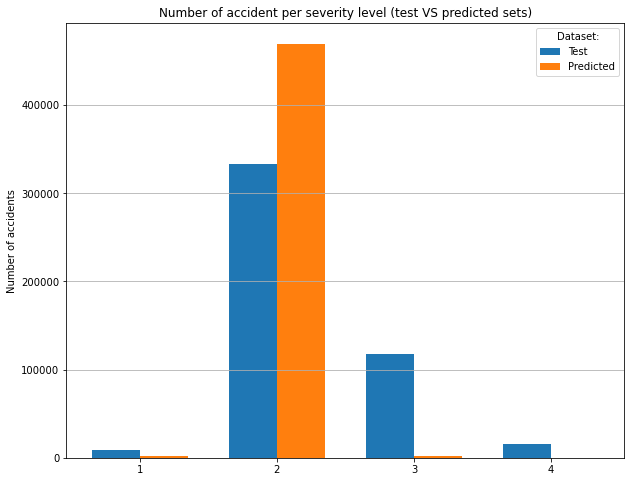

In [62]:
# count per severity in the predicted set
predict_counts = np.unique(predictions, return_counts=True) 

# count per severity in the test set
valid_counts = np.unique(Y_test, return_counts=True) 


labels=['1', '2', '3', '4']

# need to append a 0 to the missing value, for severity 4
predicted= [int(i) for i in np.append(predict_counts[1],['0'],axis=0).tolist()]
valid=valid_counts[1].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
ax.yaxis.grid(True)
rects1 = ax.bar(x - width/2, valid, width, label='Test')
rects2 = ax.bar(x + width/2, predicted, width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of accidents')
ax.set_title('Number of accident per severity level (test VS predicted sets)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Dataset:')


plt.savefig('figures/BAR_CHART_acc_number_per_severity_PREDICTIONS.png')
plt.show()



### <span style="color:orange">V.3. Predictions based on weather conditions (California)</span>
#### __Data subdivision in tests and training:__

In [63]:
# Store target results in Y
Y=ca_accidents_weather[['Severity']].copy()

# Store data source in X
X=ca_accidents_weather[weather_features].copy()

# Split in training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

#### __Model training:__


In [64]:
severity_classifier=DecisionTreeClassifier(
    max_leaf_nodes=50, 
    random_state=0)
severity_classifier.fit(X_train, Y_train)

# Get severity values
severity_list= list(map(str,ca_accidents['Severity'].unique().tolist()))

# Visualize Tree
dotfile = open("model/dtree_ca_weather_features.dot", 'w')
tree.export_graphviz(
    severity_classifier, 
    out_file = dotfile, 
    feature_names=weather_features, 
    #filled=True, 
    filled=False, 
    rounded=True, 
    impurity=False, 
    #label='all',
    class_names=severity_list)
dotfile.close()

#### __Predicted rows overview:__


In [65]:
predictions = severity_classifier.predict(X_test)
predictions[:10]

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2'], dtype=object)

In [66]:
Y_test['Severity'][:10].values

array(['3', '2', '2', '2', '2', '2', '2', '2', '2', '2'], dtype=object)

#### __Model accuracy:__


In [67]:
acc_score = accuracy_score(y_true = Y_test, y_pred = predictions)
print('Accuracy score of the predictions is: ' + str(round(acc_score,4)*100) +' %')

Accuracy score of the predictions is: 83.36 %


In [68]:
# count per severity in the predicted set
predict_counts = np.unique(predictions, return_counts=True) 

# count per severity in the test set
valid_counts = np.unique(Y_test, return_counts=True) 


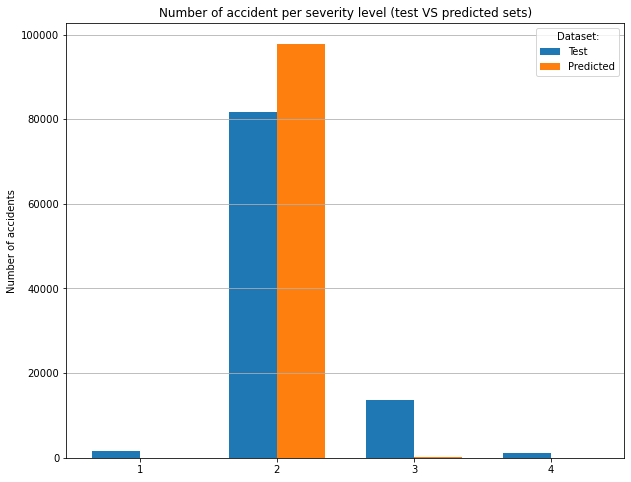

In [69]:
labels=['1', '2', '3', '4']

# add severity 1 and 4 which are missing
a = np.append(['0'],predict_counts[1], axis=0)
b = np.append(a,['0'], axis=0)
predicted=[int(i) for i in b.tolist()]

valid=valid_counts[1].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
ax.yaxis.grid(True)
rects1 = ax.bar(x - width/2, valid, width, label='Test')
rects2 = ax.bar(x + width/2, predicted, width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of accidents')
ax.set_title('Number of accident per severity level (test VS predicted sets)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Dataset:')


plt.savefig('figures/BAR_CHART_acc_number_per_severity_PREDICTIONS.png')
plt.show()



### <span style="color:orange">V.4. Predictions based on weather conditions and POI (California)</span>
#### __Data subdivision in tests and training:__

In [70]:
# Store target results in Y
Y=ca_accidents_weather_and_poi[['Severity']].copy()

# Store data source in X
X=ca_accidents_weather_and_poi[weather_and_poi_features].copy()

# Split in training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

#### __Model training:__

In [71]:
severity_classifier=DecisionTreeClassifier(
    max_leaf_nodes=50, 
    random_state=0)
severity_classifier.fit(X_train, Y_train)

# Get severity values
severity_list= list(map(str,ca_accidents['Severity'].unique().tolist()))

# Visualize Tree
dotfile = open("model/dtree_us_weather_features.dot", 'w')
tree.export_graphviz(
    severity_classifier, 
    out_file = dotfile, 
    feature_names=weather_and_poi_features, 
    #filled=True, 
    filled=False, 
    rounded=True, 
    impurity=False, 
    #label='all',
    class_names=severity_list)
dotfile.close()

#### __Predictions:__

In [72]:
predictions = severity_classifier.predict(X_test)
predictions[:10]

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2'], dtype=object)

In [73]:
Y_test['Severity'][:10].values

array(['2', '2', '3', '3', '2', '2', '2', '2', '2', '2'], dtype=object)

#### __Model accuracy:__

In [74]:
acc_score = accuracy_score(y_true = Y_test, y_pred = predictions)
print('Accuracy score of the predictions is: ' + str(round(acc_score,4)*100) +' %')

Accuracy score of the predictions is: 81.64 %


In [75]:
# count per severity in the predicted set
predict_counts = np.unique(predictions, return_counts=True) 

# count per severity in the test set
valid_counts = np.unique(Y_test, return_counts=True) 


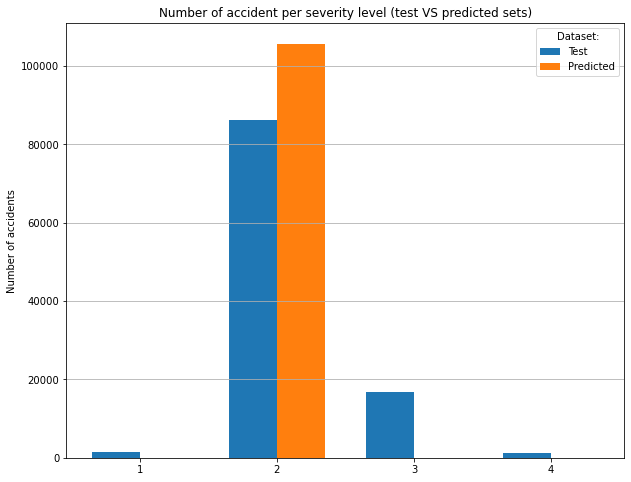

In [76]:


labels=['1', '2', '3', '4']

a = np.append(['0'],predict_counts[1], axis=0)
b = np.append(a,['0'], axis=0)
c = np.append(b,['0'], axis=0)
predicted=[int(i) for i in c.tolist()]

valid=valid_counts[1].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
ax.yaxis.grid(True)
rects1 = ax.bar(x - width/2, valid, width, label='Test')
rects2 = ax.bar(x + width/2, predicted, width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of accidents')
ax.set_title('Number of accident per severity level (test VS predicted sets)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Dataset:')


plt.savefig('figures/BAR_CHART_acc_number_per_severity_PREDICTIONS.png')
plt.show()



---------------------------
## <span style="color:red">__VI. Conclusions__</span>
---------------------------

In this first approach, severity criteria predictions for car accident were made and the model built using Decision Tree algorithm reached a precision of 81.64 % 
in the better configuration: for a context in a specific state (California) and considering weather conditions (and not road developments). 
    
But this model has clearly limitations and needs to be improve: 
- The analysis scale should be re-evaluated in a further analysis and focus mainly on a city and its agglomeration level. In this case, we limit the field of the input parameter (less different weather conditions, similar driving behavior,…)
- The decision tree algorithm meets difficulties to identify (and predict) minority severity cases less present in the dataset in the tested configuration. Another run with more balanced distribution between different severity criteria would be an interesting track to consider.